In [1]:
from steam_profile_games import obtener_juegos_steam
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn import metrics

In [2]:
API_KEY = '5EF8885FBA34D73C53DD4AF7564C44C7'

# URL del perfil de Steam
perfil_url = 'https://steamcommunity.com/id/MetalMaxALIZ/'

# Obtener el DataFrame con todos los juegos
df_juegos_propios = obtener_juegos_steam(perfil_url, API_KEY)

# Mostrar información
print(f"Total de juegos: {len(df_juegos_propios)}")
df_juegos_propios.head(10)

Total de juegos: 473


,app_id,nombre,tiempo_juego_minutos,img_icon_url,tiempo_windows_minutos,tiempo_mac_minutos,tiempo_linux_minutos,playtime_deck_forever,rtime_last_played,content_descriptorids,playtime_disconnected,has_community_visible_stats,has_leaderboards,tiempo_2semanas_minutos,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,7707,6b0312cda02f5f777efa2f3318c307ff9acafbb5,0,0,0,0,1475882850,"[2, 5]",0,NaN,NaN,NaN,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,5,aadc0ce51ff6ba2042d633f8ec033b0de62091d0,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,20,c525f76c8bc7353db4fd74b128c4ae2028426c2a,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,6,98c69e04cd59b838e05cb6980c12c05874c6419e,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,102,077b050ef3e89cd84e2c5a575d78d53b54058236,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0,077b050ef3e89cd84e2c5a575d78d53b54058236,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,507,7d5a243f9500d2f8467312822f8af2a2928777ed,0,0,0,0,1422303949,"[2, 5]",0,True,NaN,NaN,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,2553,0bbb630d63262dd66d2fdd0f7d37e8661a410075,37,0,0,0,1664845515,[5],0,NaN,NaN,NaN,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,376,25a5a16b2423bf7487ac5340b5b0948cef48c5f8,0,0,0,0,1498957512,NaN,0,True,True,NaN,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,37285,8dbc71957312bbd3baea65848b545be9eae2a355,9663,0,0,0,1704987692,"[2, 5]",0,True,NaN,NaN,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [3]:
# Nos quedamos solo con las columnas de interés 
columnas_interes = ['app_id', 'nombre', 'tiempo_juego_horas', 'imagen_url', 'store_url']
df_juegos_propios_filtrado = df_juegos_propios[columnas_interes]
df_juegos_propios_filtrado.shape


(473, 5)

In [4]:
df_juegos_propios_filtrado.head(10)

,app_id,nombre,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [5]:
# Eliminamos los que tengan el mismo nombre
df_juegos_propios_filtrado = df_juegos_propios_filtrado.drop_duplicates(subset=['nombre'])

In [6]:
# Convertimos df_juegos_propios_filtrado a un diccionario para facilitar la búsqueda
juegos_dict = df_juegos_propios_filtrado.set_index('nombre').T.to_dict('index')
juegos_dict

{'app_id': {'Counter-Strike': 10,
  'Day of Defeat': 30,
  'Deathmatch Classic': 40,
  'Ricochet': 60,
  'Counter-Strike: Condition Zero': 80,
  'Counter-Strike: Condition Zero Deleted Scenes': 100,
  'Left 4 Dead 2': 550,
  'Dota 2': 570,
  'Portal 2': 620,
  'Counter-Strike 2': 730,
  'Psychonauts': 3830,
  "Sid Meier's Civilization IV": 3900,
  "Sid Meier's Civilization III: Complete": 3910,
  "Sid Meier's Pirates!": 3920,
  "Sid Meier's Civilization IV: Warlords": 3990,
  "Garry's Mod": 4000,
  'Condemned: Criminal Origins': 4720,
  'Natural Selection 2': 4920,
  'Hitman 2: Silent Assassin': 6850,
  'Hitman: Codename 47': 6900,
  'X-Blades': 7510,
  'Two Worlds II HD': 7520,
  'Two Worlds II Castle Defense': 7530,
  "Sid Meier's Railroads!": 7600,
  'BioShock': 7670,
  'Kane & Lynch: Dead Men': 8080,
  'Just Cause 2': 8190,
  "Sid Meier's Civilization IV: Beyond the Sword": 8800,
  "Sid Meier's Civilization V": 8930,
  'Saints Row 2': 9480,
  'Overlord': 11450,
  'Overlord: Raising

------------------------------------

------------------------------------

In [7]:
# Crear un dataframe de juegos_rawg.db
from rawg_api_scraper_reintentos import obtener_dataframe_juegos
df_rawg = obtener_dataframe_juegos()
df_rawg

,id,name,background_image,metacritic,steam_store_id,genres,tags,fecha_extraccion
0,1,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,NaN,19827,"Adventure, Puzzle","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:05:45
1,2,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,75.0,18705,"Action, Adventure, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 13:59:13
2,3,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,NaN,23421,"Action, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 14:06:44
3,4,Penarium,https://media.rawg.io/media/screenshots/68b/68...,80.0,19765,"Action, Arcade, Casual, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 13:58:02
4,5,Standpoint,https://media.rawg.io/media/screenshots/238/23...,NaN,25258,"Action, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:16:44
...,...,...,...,...,...,...,...,...
99068,1015265,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,NaN,1017113,"RPG, Simulation, Casual, Indie","Singleplayer, Steam Achievements, Atmospheric,...",2025-11-25 15:38:02
99069,1015266,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,NaN,1017114,Indie,"Singleplayer, 2D, Horror, 3D, Walking Simulato...",2025-11-25 15:38:02
99070,1015267,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,NaN,1017115,"Action, Indie","Singleplayer, Steam Achievements, Steam Cloud,...",2025-11-25 15:38:02
99071,1015268,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,NaN,1017116,Action,"Singleplayer, Stealth, Survival Horror, VR, Fa...",2025-11-25 15:38:02


In [8]:
# Eliminamos las columnas que no nos interesan
df_rawg = df_rawg.drop(columns=['fecha_extraccion', 'id', 'tags', 'metacritic', 'steam_store_id' ])

In [9]:
df_rawg

,name,background_image,genres
0,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,"Adventure, Puzzle"
1,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,"Action, Adventure, Casual, Indie"
2,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,"Action, Casual, Indie"
3,Penarium,https://media.rawg.io/media/screenshots/68b/68...,"Action, Arcade, Casual, Indie"
4,Standpoint,https://media.rawg.io/media/screenshots/238/23...,"Action, Indie"
...,...,...,...
99068,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,"RPG, Simulation, Casual, Indie"
99069,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,Indie
99070,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,"Action, Indie"
99071,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,Action


------------------------------------

------------------------------------

In [10]:
# Creamos un dataframe de steam_data.db
from SteamSpy import obtener_dataframe_steam_data
df_steam_spy = obtener_dataframe_steam_data()
df_steam_spy

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",33076,731,6137,295,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",10632,622,962,250,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",23472,855,6057,316,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3799,689,2202,219,2999,2999,0,18028
4,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",23714,330,4326,89,0,0,0,43819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,"Nikoballz, PnDAa",Nikoballz,,7,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0
86537,3223680,Rescue Girl Operation: Code X,2024-NGame,2024-NGame,,1,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86538,3310110,Big Burger Tower,Frozen Logic Studios,Frozen Logic Studios,,2,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86539,1589920,Long Ago: A Puzzle Tale,GrimTalin,GrimTalin,,15,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0


In [11]:
# Nos quedamos solo con las columnas de interés 
columnas_interes_steam_spy = ['appid','name','positive','negative', 'owners', 'initialprice']
df_steam_spy_interes = df_steam_spy[columnas_interes_steam_spy]
df_steam_spy_interes

,appid,name,positive,negative,owners,initialprice
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",0
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",0
2,578080,PUBG: BATTLEGROUNDS,1520457,1037487,"100,000,000 .. 200,000,000",0
3,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",2999
4,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",0
...,...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",499
86537,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",399
86538,3310110,Big Burger Tower,2,1,"0 .. 20,000",399
86539,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",499


In [12]:
# Reemplazamos los las filas que contengan el string None de la columna price por NaN
df_steam_spy_interes['initialprice'] = df_steam_spy_interes['initialprice'].replace('None', np.nan)


C:\Users\Metal\AppData\Local\Temp\ipykernel_42572\965189360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_spy_interes['initialprice'] = df_steam_spy_interes['initialprice'].replace('None', np.nan)


In [13]:
# Borramos las filas con precios nulos ya que son muy pocas
df_steam_spy_interes = df_steam_spy_interes.dropna(subset=['initialprice'])
#df_steam_spy_interes.shape

------------------------------------

------------------------------------

In [14]:
# combinar los dataset df_steam_spy y df_rawg_filtrado usando la columna name
df_combinado = pd.merge(df_steam_spy_interes, df_rawg, left_on='name', right_on='name', how='inner')
df_combinado.shape

(62012, 8)

In [15]:
df_combinado

,appid,name,positive,negative,owners,initialprice,background_image,genres
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",0,https://media.rawg.io/media/games/736/73619bd3...,Shooter
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",0,https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter"
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",2999,https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie"
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",0,https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter"
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",6999,https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter"
...,...,...,...,...,...,...,...,...
62007,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",499,https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie"
62008,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",399,https://media.rawg.io/media/screenshots/ccd/cc...,Adventure
62009,3310110,Big Burger Tower,2,1,"0 .. 20,000",399,https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual"
62010,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",499,https://media.rawg.io/media/screenshots/73e/73...,Indie


In [16]:
# Cambiamos la columna 'initialprice' a tipo int y las cambiamos a euros

df_combinado['initialprice'] = df_combinado['initialprice'].astype(int) / 100



In [17]:
df_combinado

,appid,name,positive,negative,owners,background_image,genres
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter"
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie"
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter"
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter"
...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie"
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual"
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie


In [17]:
# Sacamos un porcentaje de votos positivos enbase a las columnas positive y negative y los dejamos con dos decimales
df_combinado['porcentaje_votos_positivos'] = (df_combinado['positive'].astype(float) / (df_combinado['positive'].astype(float) + df_combinado['negative'].astype(float)) * 100).round(2)
df_combinado

,appid,name,positive,negative,owners,initialprice,background_image,genres,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",0.00,https://media.rawg.io/media/games/736/73619bd3...,Shooter,86.69
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",0.00,https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",67.14
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",29.99,https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",94.10
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",0.00,https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",69.99,https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",58.76
...,...,...,...,...,...,...,...,...,...
62007,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",4.99,https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",77.78
62008,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",3.99,https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,50.00
62009,3310110,Big Burger Tower,2,1,"0 .. 20,000",3.99,https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",66.67
62010,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",4.99,https://media.rawg.io/media/screenshots/73e/73...,Indie,88.24


In [18]:
# Cambiamos los datos de la columna 'owners' para que en vez de un rango de personas que tienen el juego, tengamos un valor numérico que sea la media del rango. Por ejemplo si el campo contiene '500,000 .. 1,000,000' lo cambiariamos a 750000
def calcular_media_owners(rango):
    partes = rango.split(' .. ')
    if len(partes) == 2:
        min_owners = int(partes[0].replace(',', ''))
        max_owners = int(partes[1].replace(',', ''))
        return (min_owners + max_owners) // 2
    return np.nan
df_combinado['owners'] = df_combinado['owners'].apply(calcular_media_owners)
df_combinado



,appid,name,positive,negative,owners,initialprice,background_image,genres,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,150000000,0.00,https://media.rawg.io/media/games/736/73619bd3...,Shooter,86.69
1,1172470,Apex Legends,668053,326926,150000000,0.00,https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",67.14
2,1623730,Palworld,358266,22443,75000000,29.99,https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",94.10
3,440,Team Fortress 2,1044264,117208,75000000,0.00,https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,75000000,69.99,https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",58.76
...,...,...,...,...,...,...,...,...,...
62007,2571600,Meurtre Au Florian,7,2,10000,4.99,https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",77.78
62008,3223680,Rescue Girl Operation: Code X,1,1,10000,3.99,https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,50.00
62009,3310110,Big Burger Tower,2,1,10000,3.99,https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",66.67
62010,1589920,Long Ago: A Puzzle Tale,15,2,10000,4.99,https://media.rawg.io/media/screenshots/73e/73...,Indie,88.24


In [24]:
df_combinado.sort_values('initialprice')

,appid,name,positive,negative,owners,initialprice,background_image,genres,porcentaje_votos_positivos,rango_precio
0,730,Counter-Strike: Global Offensive,7642084,1173003,150000000,0.00,https://media.rawg.io/media/games/736/73619bd3...,Shooter,86.69,NaN
12653,1090760,Distant Kingdoms,132,172,35000,0.00,https://media.rawg.io/media/screenshots/dc4/dc...,"Strategy, Simulation, Indie",43.42,NaN
46395,2449180,环形杀手 Circle Killer,3,2,10000,0.00,https://media.rawg.io/media/screenshots/367/36...,"Action, Adventure, RPG, Racing, Casual, Indie",60.00,NaN
12671,1132880,The Pilgrim,132,7,35000,0.00,https://media.rawg.io/media/screenshots/65f/65...,Indie,94.96,NaN
12674,358420,Xenophage: Alien Bloodsport,7,42,35000,0.00,https://media.rawg.io/media/screenshots/044/04...,"Action, Arcade, Fighting",14.29,NaN
...,...,...,...,...,...,...,...,...,...,...
48790,253670,Aartform Curvy 3D 3.0,32,13,10000,299.90,https://media.rawg.io/media/screenshots/0b9/0b...,None,71.11,NaN
34677,2936160,Pyramid Game,9,13,10000,484.45,https://media.rawg.io/media/screenshots/aa5/aa...,"Simulation, Casual, Massively Multiplayer, Indie",40.91,NaN
33394,3013840,True Love,3,1,10000,500.00,https://media.rawg.io/media/games/385/3851ab32...,"Action, Adventure, Casual, Indie",75.00,NaN
52061,1200520,Ascent Free-Roaming VR Experience,6,1,10000,999.00,https://media.rawg.io/media/screenshots/86a/86...,Action,85.71,NaN


# Análisis de Datos - Gráficas

Análisis exploratorio del dataset combinado de juegos de Steam

In [20]:
# Preparar datos: Separar los géneros en columnas individuales
df_combinado_generos = pd.get_dummies(df_combinado['genres'].str.split(', ').explode()).groupby(level=0).sum()
df_combinado_con_generos = pd.concat([df_combinado, df_combinado_generos], axis=1)

print(f"Géneros encontrados: {list(df_combinado_generos.columns)}")
print(f"Shape del DataFrame con géneros: {df_combinado_con_generos.shape}")

Géneros encontrados: ['Action', 'Adventure', 'Arcade', 'Board Games', 'Card', 'Casual', 'Educational', 'Family', 'Fighting', 'Indie', 'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
Shape del DataFrame con géneros: (62012, 28)


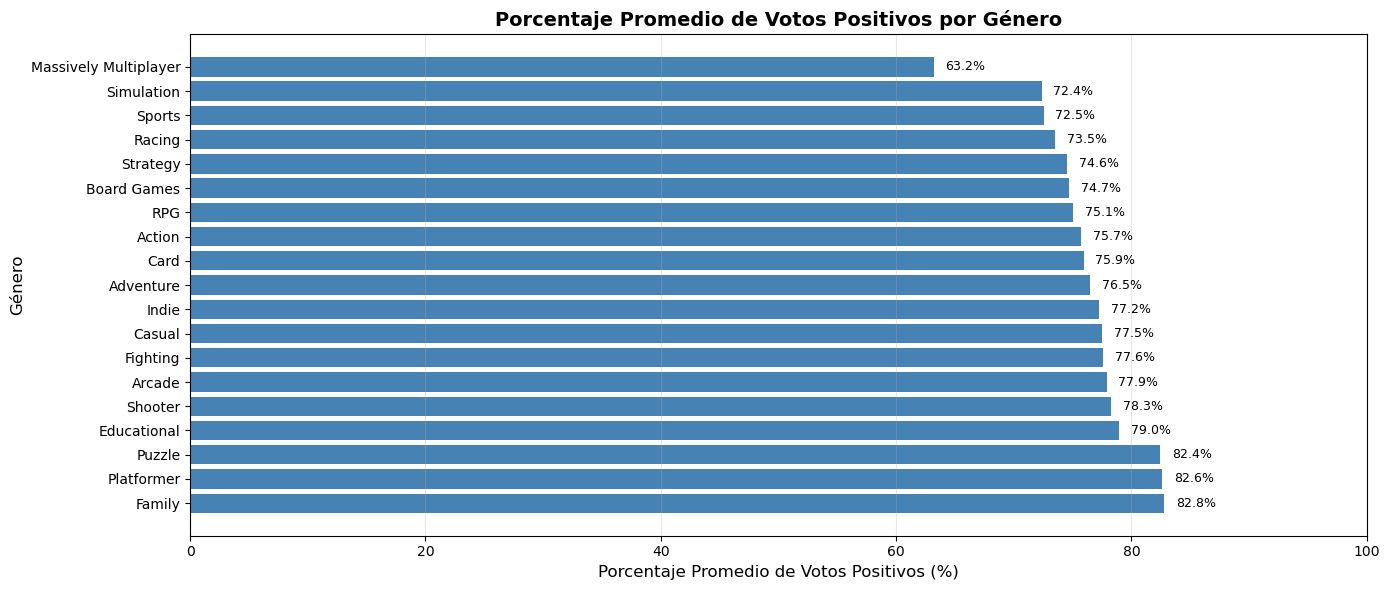


Estadísticas por Género:
               Género  Promedio_Votos_Positivos
               Family                 82.777686
           Platformer                 82.601406
               Puzzle                 82.445733
          Educational                 78.986238
              Shooter                 78.263505
               Arcade                 77.901041
             Fighting                 77.618957
               Casual                 77.486869
                Indie                 77.237308
            Adventure                 76.514270
                 Card                 75.945283
               Action                 75.747949
                  RPG                 75.073268
          Board Games                 74.715339
             Strategy                 74.570406
               Racing                 73.509233
               Sports                 72.546153
           Simulation                 72.380434
Massively Multiplayer                 63.190208


In [21]:
# GRÁFICA 1: Géneros vs Porcentaje de Votos Positivos
# Calcular el promedio de votos positivos por género

generos_columnas = df_combinado_generos.columns
promedios_por_genero = []

for genero in generos_columnas:
    juegos_del_genero = df_combinado_con_generos[df_combinado_con_generos[genero] == 1]
    promedio = juegos_del_genero['porcentaje_votos_positivos'].mean()
    promedios_por_genero.append(promedio)

df_generos_analisis = pd.DataFrame({
    'Género': generos_columnas,
    'Promedio_Votos_Positivos': promedios_por_genero
}).sort_values('Promedio_Votos_Positivos', ascending=False)

# Crear la gráfica
plt.figure(figsize=(14, 6))
plt.barh(df_generos_analisis['Género'], df_generos_analisis['Promedio_Votos_Positivos'], color='steelblue')
plt.xlabel('Porcentaje Promedio de Votos Positivos (%)', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.title('Porcentaje Promedio de Votos Positivos por Género', fontsize=14, fontweight='bold')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(df_generos_analisis['Promedio_Votos_Positivos']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nEstadísticas por Género:")
print(df_generos_analisis.to_string(index=False))

LinAlgError: SVD did not converge in Linear Least Squares

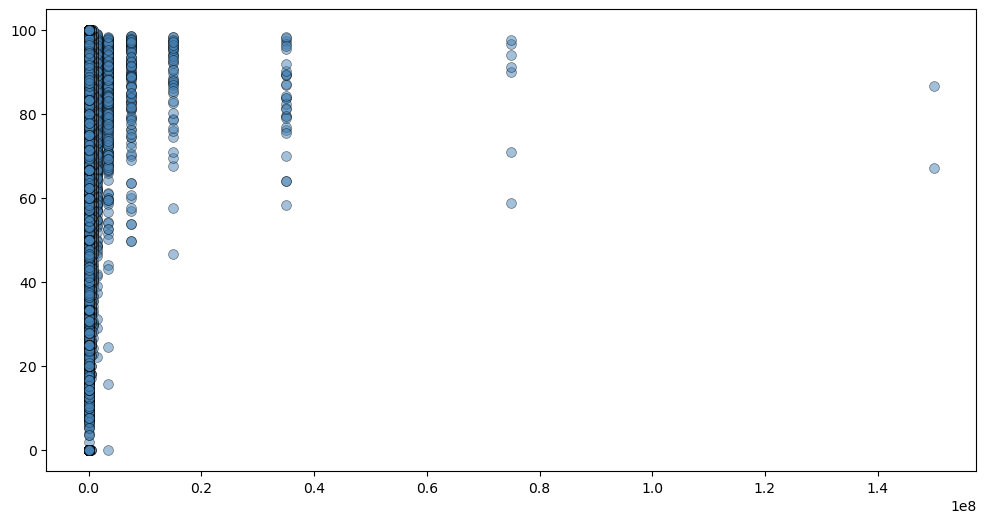

In [22]:
# GRÁFICA 2: Owners vs Porcentaje de Votos Positivos
# Gráfico de dispersión con línea de tendencia

plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(df_combinado['owners'], df_combinado['porcentaje_votos_positivos'], 
            alpha=0.5, s=50, c='steelblue', edgecolors='black', linewidth=0.5)

# Línea de tendencia
z = np.polyfit(df_combinado['owners'], df_combinado['porcentaje_votos_positivos'], 1)
p = np.poly1d(z)
plt.plot(df_combinado['owners'].sort_values(), p(df_combinado['owners'].sort_values()), 
         "r--", linewidth=2, label=f'Tendencia: y={z[0]:.2e}x+{z[1]:.2f}')

plt.xlabel('Número de Propietarios (Owners)', fontsize=12)
plt.ylabel('Porcentaje de Votos Positivos (%)', fontsize=12)
plt.title('Relación entre Número de Propietarios y Votos Positivos', fontsize=14, fontweight='bold')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular correlación
correlacion = df_combinado[['owners', 'porcentaje_votos_positivos']].corr().iloc[0, 1]
print(f"\nCoeficiente de correlación: {correlacion:.4f}")

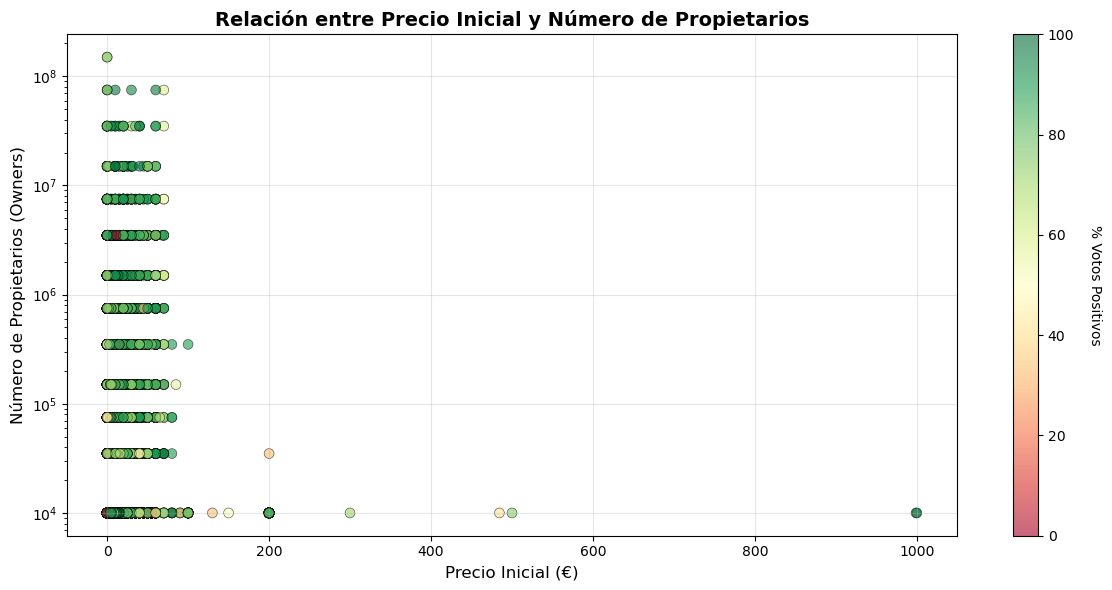


Coeficiente de correlación Precio-Owners: 0.0524

Estadísticas de Owners por Rango de Precio:
                      mean   median  count
rango_precio                              
0-5€          4.205392e+04  10000.0  24962
5-10€         7.941623e+04  10000.0  14963
10-20€        1.787925e+05  10000.0  11060
20-50€        4.751363e+05  35000.0   3449
>50€          1.479944e+06  35000.0    360


C:\Users\Metal\AppData\Local\Temp\ipykernel_42572\2348105714.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_precio = df_combinado.groupby('rango_precio')['owners'].agg(['mean', 'median', 'count'])


In [ ]:
# GRÁFICA 3: Precio Inicial vs Owners
# Gráfico de dispersión

plt.figure(figsize=(12, 6))

# Scatter plot con gradiente de color basado en votos positivos
scatter = plt.scatter(df_combinado['initialprice'], df_combinado['owners'], 
                     c=df_combinado['porcentaje_votos_positivos'], 
                     cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.xlabel('Precio Inicial (€)', fontsize=12)
plt.ylabel('Número de Propietarios (Owners)', fontsize=12)
plt.title('Relación entre Precio Inicial y Número de Propietarios', fontsize=14, fontweight='bold')
plt.yscale('log')  # Escala logarítmica para owners
plt.grid(True, alpha=0.3)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('% Votos Positivos', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Correlación
correlacion = df_combinado[['initialprice', 'owners']].corr().iloc[0, 1]
print(f"\nCoeficiente de correlación Precio-Owners: {correlacion:.4f}")

# Estadísticas por rangos de precio
df_combinado['rango_precio'] = pd.cut(df_combinado['initialprice'], 
                                       bins=[0, 5, 10, 20, 50, 100],
                                       labels=['0-5€', '5-10€', '10-20€', '20-50€', '>50€'])

stats_precio = df_combinado.groupby('rango_precio')['owners'].agg(['mean', 'median', 'count'])
print("\nEstadísticas de Owners por Rango de Precio:")
print(stats_precio)

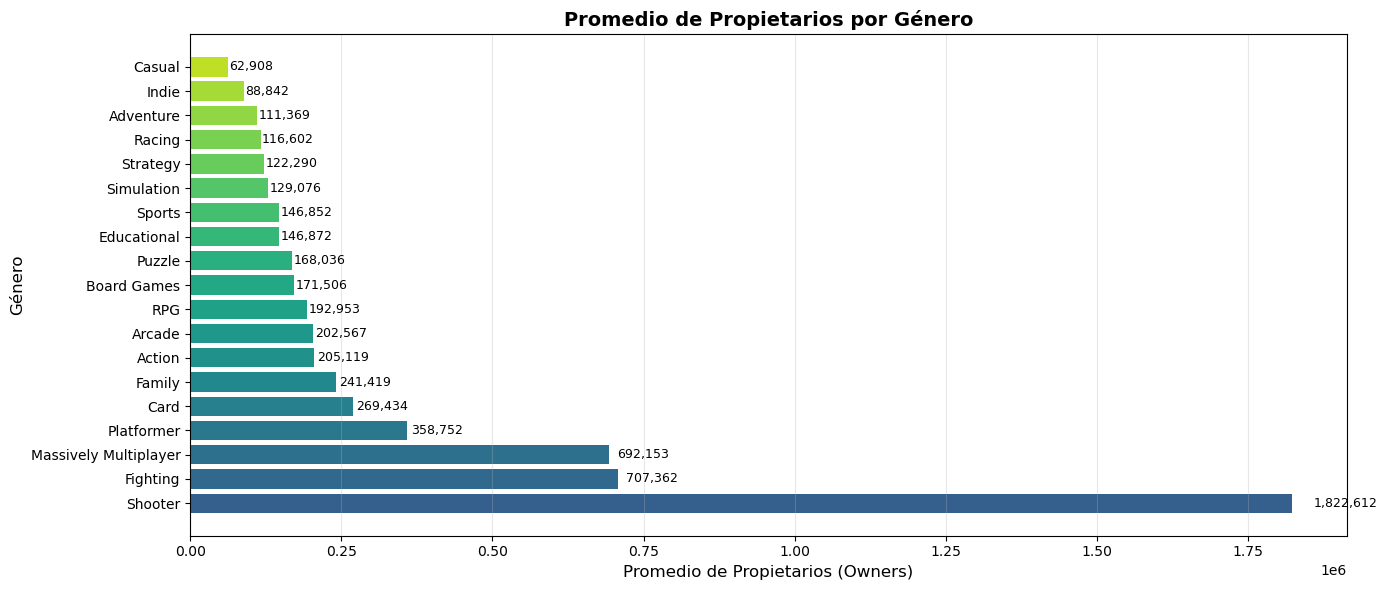


Estadísticas de Owners por Género:
               Género  Promedio_Owners
              Shooter     1.822612e+06
             Fighting     7.073620e+05
Massively Multiplayer     6.921534e+05
           Platformer     3.587518e+05
                 Card     2.694340e+05
               Family     2.414192e+05
               Action     2.051191e+05
               Arcade     2.025670e+05
                  RPG     1.929533e+05
          Board Games     1.715063e+05
               Puzzle     1.680356e+05
          Educational     1.468720e+05
               Sports     1.468523e+05
           Simulation     1.290756e+05
             Strategy     1.222904e+05
               Racing     1.166021e+05
            Adventure     1.113690e+05
                Indie     8.884171e+04
               Casual     6.290836e+04


In [25]:
# GRÁFICA 4: Géneros vs Owners
# Calcular el promedio de owners por género

promedios_owners_por_genero = []

for genero in generos_columnas:
    juegos_del_genero = df_combinado_con_generos[df_combinado_con_generos[genero] == 1]
    promedio = juegos_del_genero['owners'].mean()
    promedios_owners_por_genero.append(promedio)

df_generos_owners = pd.DataFrame({
    'Género': generos_columnas,
    'Promedio_Owners': promedios_owners_por_genero
}).sort_values('Promedio_Owners', ascending=False)

# Crear la gráfica
plt.figure(figsize=(14, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(df_generos_owners)))
plt.barh(df_generos_owners['Género'], df_generos_owners['Promedio_Owners'], color=colors)
plt.xlabel('Promedio de Propietarios (Owners)', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.title('Promedio de Propietarios por Género', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(df_generos_owners['Promedio_Owners']):
    plt.text(v + v*0.02, i, f'{v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nEstadísticas de Owners por Género:")
print(df_generos_owners.to_string(index=False))

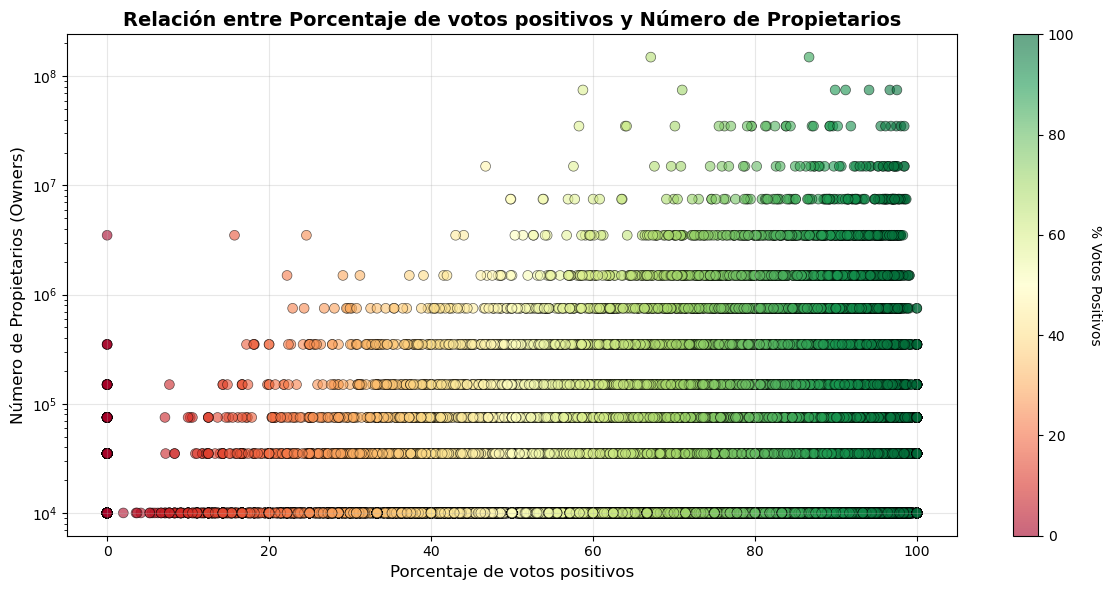


Coeficiente de correlación Porcentaje de votos positivos-Owners: 0.0231


In [29]:
# GRÁFICA 3: Precio Inicial vs Owners
# Gráfico de dispersión

plt.figure(figsize=(12, 6))

# Scatter plot con gradiente de color basado en votos positivos
scatter = plt.scatter(df_combinado['porcentaje_votos_positivos'], df_combinado['owners'], 
                     c=df_combinado['porcentaje_votos_positivos'], 
                     cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.xlabel('Porcentaje de votos positivos', fontsize=12)
plt.ylabel('Número de Propietarios (Owners)', fontsize=12)
plt.title('Relación entre Porcentaje de votos positivos y Número de Propietarios', fontsize=14, fontweight='bold')
plt.yscale('log')  # Escala logarítmica para owners
plt.grid(True, alpha=0.3)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('% Votos Positivos', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Correlación
correlacion = df_combinado[['porcentaje_votos_positivos', 'owners']].corr().iloc[0, 1]
print(f"\nCoeficiente de correlación Porcentaje de votos positivos-Owners: {correlacion:.4f}")
